In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\emman\OneDrive\Documents\Instacart Basket Analysis (Oct-22)'

In [43]:
orders_products_merged = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'orders_products_merged_updated.pkl'))

# Creating Bar Charts

<AxesSubplot:>

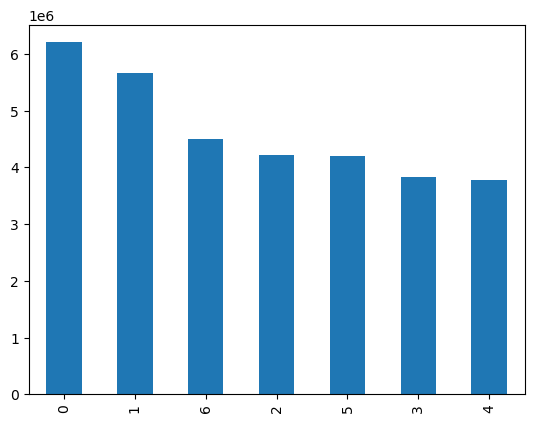

In [4]:
orders_products_merged['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

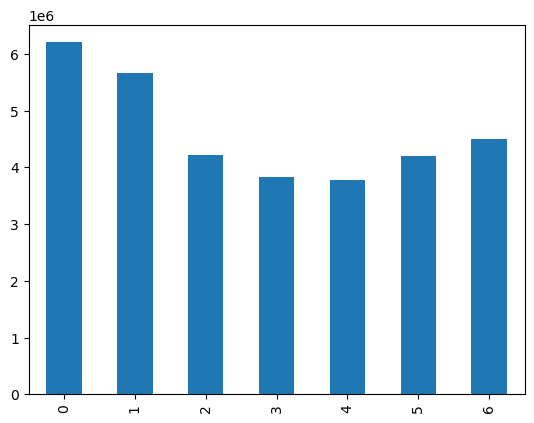

In [5]:
orders_products_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

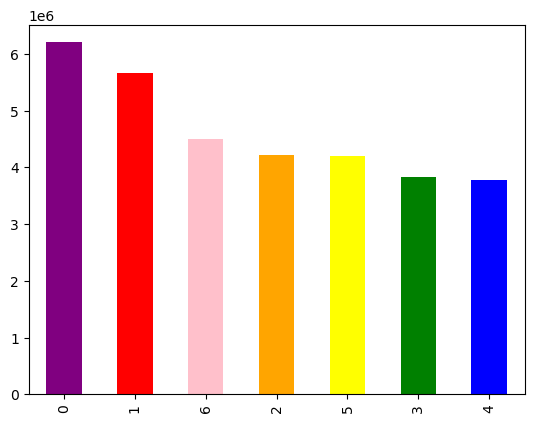

In [6]:
bar = orders_products_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'],)

# Exporting Charts

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

In [9]:
orders_products_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [10]:
orders_products_merged['prices'].mean()

7.790994092171152

In [11]:
orders_products_merged['prices'].min()

1.0

In [12]:
orders_products_merged['prices'].max()

25.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

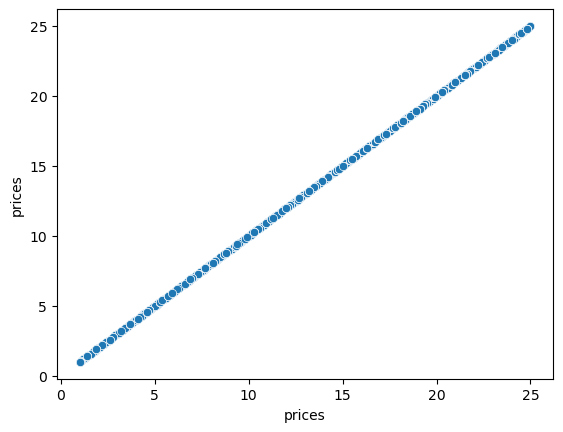

In [13]:
#creating scatter plots
sns.scatterplot(x = 'prices', y = 'prices',data = orders_products_merged)

In [14]:
orders_products_merged.loc[orders_products_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag


In [15]:
# replacing values with NaNs

orders_products_merged.loc[orders_products_merged['prices'] >100, 'prices'] = np.nan

In [16]:
orders_products_merged['prices'].max()

25.0

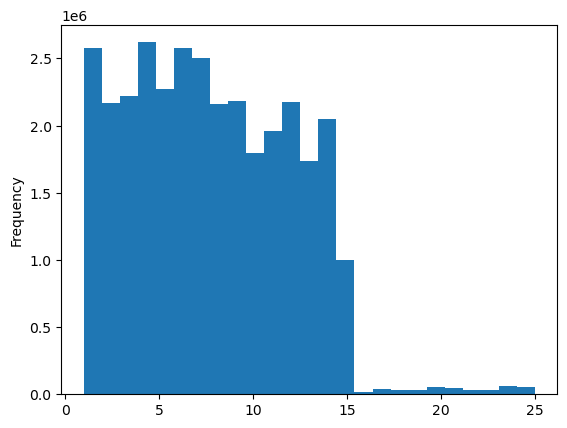

In [17]:
hist = orders_products_merged['prices'].plot.hist(bins = 25)

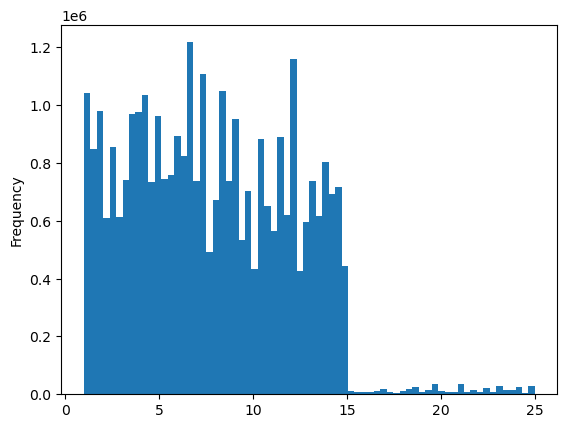

In [18]:
hist_2 = orders_products_merged['prices'].plot.hist(bins = 70)

In [19]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price.png'))

# Sampling Data

In [20]:
np.random.seed(4)
dev = np.random.rand(len(orders_products_merged)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [24]:
# create a list holding true/false values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(orders_products_merged)) <= 0.7

In [32]:
# store 70% of the sample in the data frame big

big = orders_products_merged[dev]

In [33]:
# store 30% of the sample in the data frame small

small = orders_products_merged[~dev]

In [27]:
len(orders_products_merged)

32404859

In [28]:
len(big) + len(small)

32404859

In [34]:
df_2 = small[['orders_day_of_week','prices']]

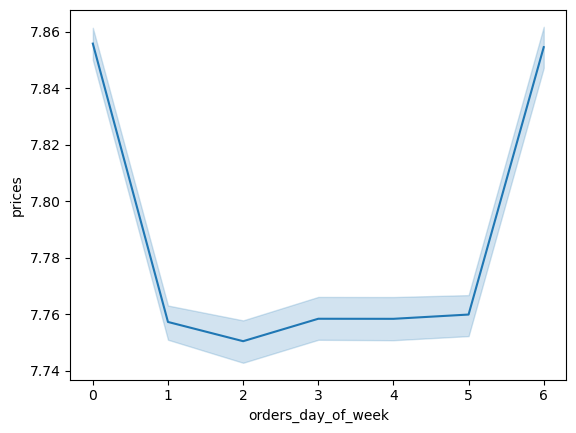

In [35]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

# Task part 2

### Question 3

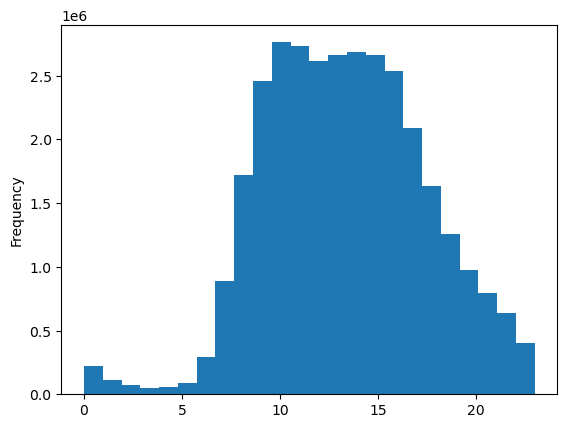

In [36]:
hist_hour = orders_products_merged['order_hour_of_day'].plot.hist(bins = 24)

## the histagram shows the total number of orders by the hours

## Question 4

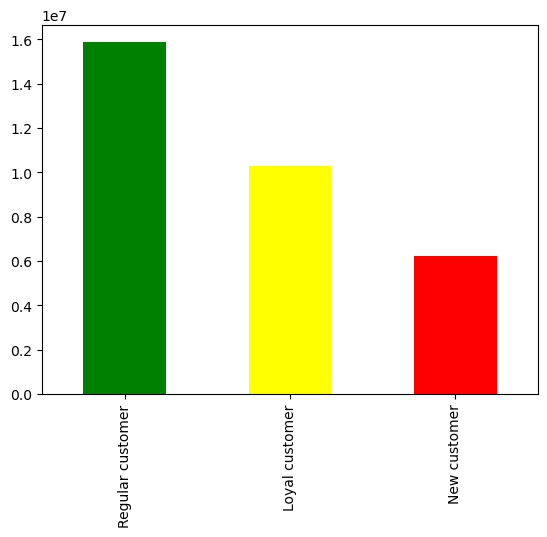

In [37]:
#plotting bar chart for the loyalty flag

loyalty_bar = orders_products_merged['loyalty_flag'].value_counts().plot.bar(color = ['green', 'yellow', 'red'])

## Question 5

In [38]:
#using the earlier splitted data of 30% and selecting the right columns

df_prices_hour = small[['order_hour_of_day', 'prices']]

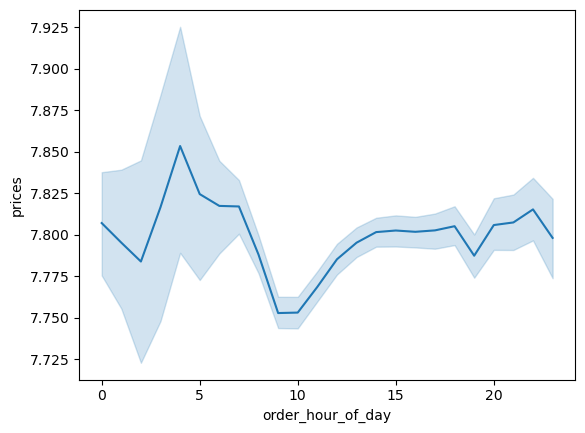

In [39]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

## Exporting visuals

In [44]:
line2.figure.savefig(os.path.join(path,  'line_prices_hour_4_9.png'))

In [45]:
loyalty_bar.figure.savefig(os.path.join(path,  'loyalty_bar_4_9.png'))

In [46]:
hist_hour.figure.savefig(os.path.join(path,  'hist_hour_4_9.png'))